Load the `ISLR2` and `tidyverse` packages.

In [24]:
library('ISLR2')
library('tidyverse')
library('tidymodels')



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [25]:
glimpse(Auto)



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


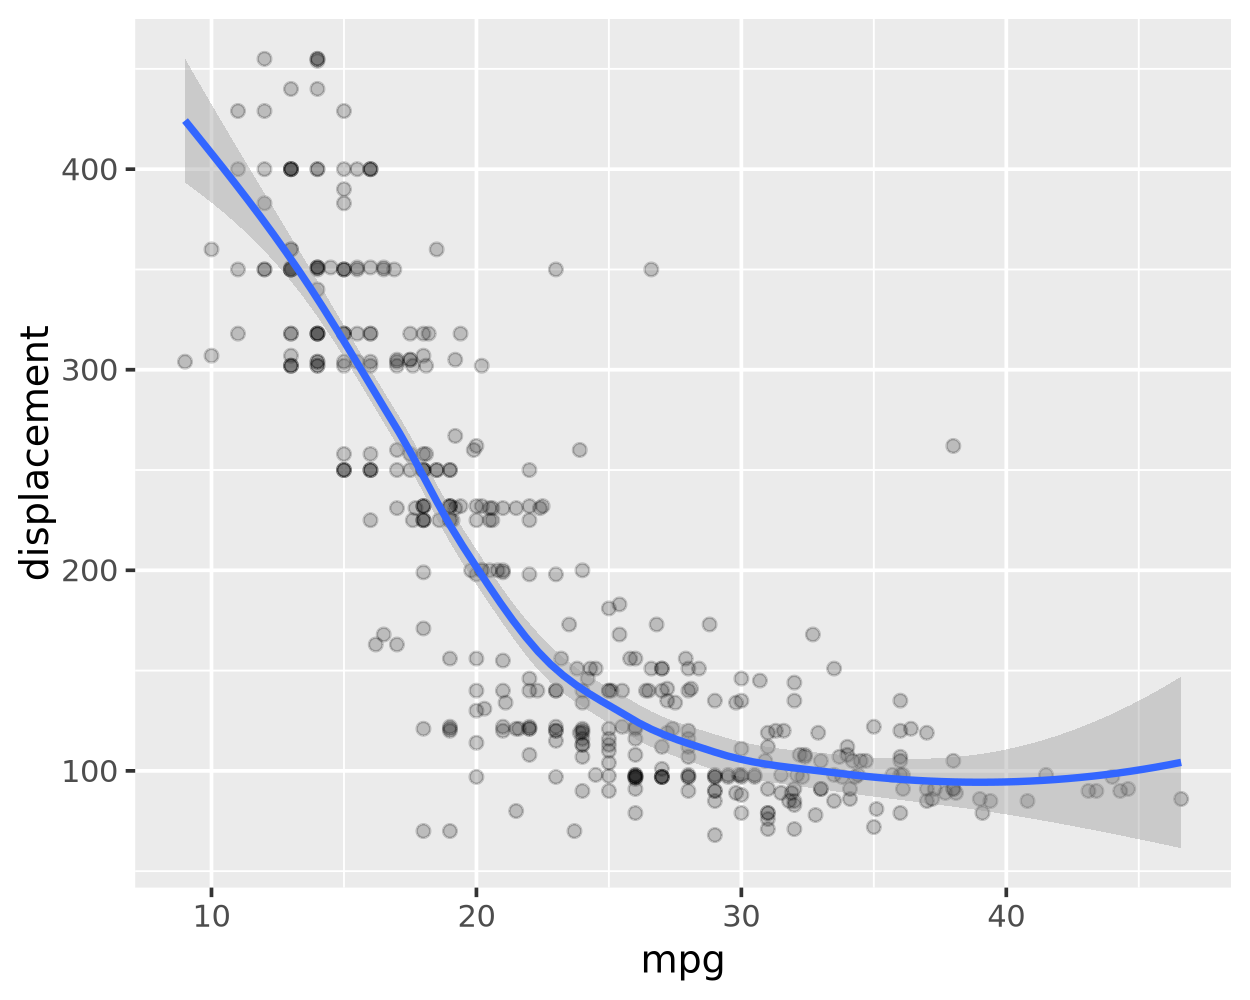

In [26]:
ggplot(Auto, aes(x = mpg, y = displacement)) +
 geom_point(alpha = 0.2) +
    stat_smooth()


❓Does the relationship of `mpg` to `displacement` look linear?

no



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [43]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement, deg_free = 4) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
               step_dummy(cyl_cat) |>
               step_rm(cylinders)  
mod = linear_reg() |> set_engine('lm') 



wf = workflow() |>
               add_recipe(rec) |>
               add_model(mod)
mod_fit = wf |> fit(data = Auto)

               
tidy(mod_fit)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),21.71341,2.076163,10.458432,1.096769e-22
displacement_ns_1,-13.23980,1.653290,-8.008150,1.411399e-14
displacement_ns_2,-17.08261,2.627151,-6.502334,2.471080e-10
displacement_ns_3,-30.28688,3.475786,-8.713679,8.987932e-17
displacement_ns_4,-16.57897,2.493669,-6.648424,1.022718e-10
cyl_cat_X4,15.83670,2.286658,6.925697,1.841195e-11
cyl_cat_X5,17.48808,3.338931,5.237629,2.689872e-07
cyl_cat_X6,13.91760,2.562763,5.430701,9.993363e-08
cyl_cat_X8,13.55862,3.080457,4.401498,1.396011e-05


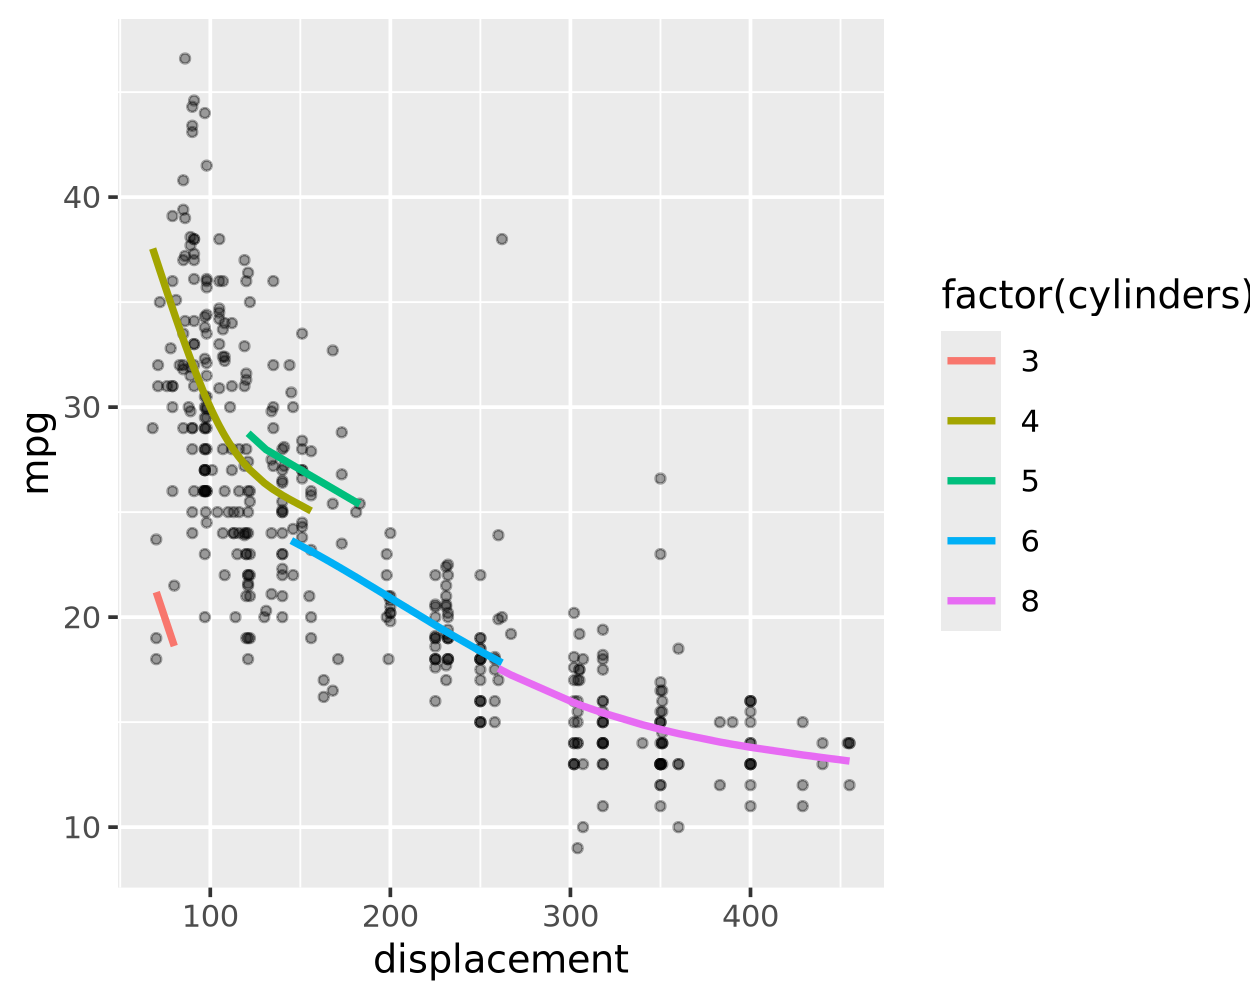

In [46]:
predict(mod_fit, new_data = Auto) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

